# Abstract

A Census official would like to use a given number of factors to predict salary of more than 50K. He hires consultants who would create a model that can predict salary and that has a good accuracy score.


# Introduction

As the consultants we have data from the Census department. The dataset has categorical data so we hope to use a classification model to predict the salary given a set of features. This a binary problem, where salary is classified as either equal to or less than 50K, or classified as greater than 50K.


### Problem
For the given Census data can we predict whether a person will earn <=50K or >50?

### Solution
Create a classification regression that predicts salary.

## Goal
Train a classification model than performs better than 0.75 accuracy.


# Research Questions
- Which model has the best accuracy test score?
- What are some of the ways we can reduce bias?
- How do we test our model?

## DataSet


In [2]:
# import numpy, pandas, matplotlib, seaborn and sklearn

import numpy as np
import pandas as pd

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn; seaborn.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Open data file

This data file is a .data there we put a delimiter to open it. It also does not have a column header. 
Using information on the attributes from the source website we make a column header. 

In [15]:
# Open data file
# Since it is a .data file it has a , delimiter
# Need to add columns names as it does not have column names

df=pd.read_csv("adult.data", delimiter=",", names=['age','workclass','fnlwgt','education','edu_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','salary'])
            
df.head(5)          

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
df.shape

(32561, 15)

In [24]:
# This is the Target variable
# Check the ratio of salary 

df["salary"].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [25]:
# Model accuracy rate

24720/(24720+7841)

0.7591904425539756

#### Define the X and Y variables.

In [16]:
# Define the X and Y variables

y = df.loc[:, "salary"]

X = df.loc[:, ['age','workclass','fnlwgt','education','edu_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country']]

X.head(2)

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States


In [35]:
y.value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

# Exploratory Data Analysis

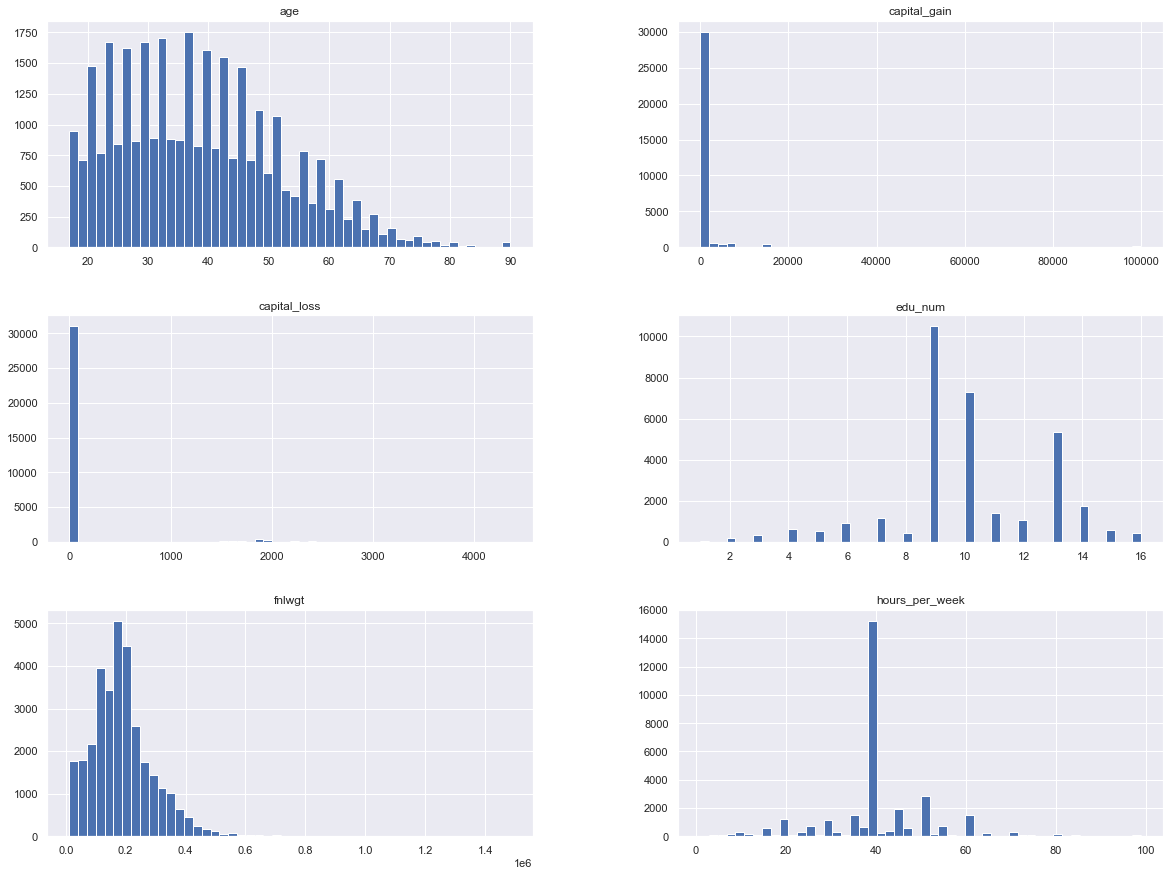

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
X.hist(bins=50, figsize=(20,15))
plt.show()

In the graphs above, the age graph is skewed towards the right, which is expected as this is data of a working population. It also has some spikes, however they follow the general shape of the curve.

The graphs for the capital gain and capital loss both indicate that majority of the people have no capital gain or loss. 

The education numbers indicate the level of education, these show that most peole have a high school education, followed by some college education. 

Most people work 40 hours a week which is expected for most full time jobs.

The fnlwgt is a reference number so that will be dropped. 

In [7]:
X.groupby('education')[['edu_num']].count()

,edu_num
education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


Text(0, 0.5, 'Numbers')

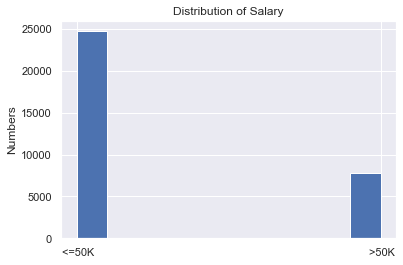

In [22]:
# Make a graph for y

plt.hist(y)
plt.title("Distribution of Salary")
plt.ylabel("Numbers")

From the data it is evident that there are way more people who earn equal to or less than 50K. 

Text(0.5, 1.0, 'Hours worked per week')

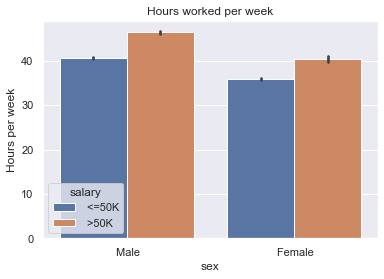

In [82]:
seaborn.barplot(x="sex",y="hours_per_week", hue="salary", data=df)
plt.ylabel('Hours per week')
plt.title('Hours worked per week')

This graphs shows that men tend to earn alittle more money than women and also work afew more hours per week.

Text(0.5, 1.0, 'Hours worked per week')

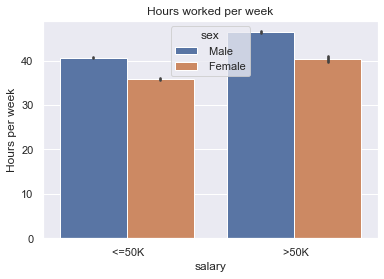

In [20]:
seaborn.barplot(x="salary",y="hours_per_week", hue="sex", data=df)
plt.ylabel('Hours per week')
plt.title('Hours worked per week')

People who earn more than 50K tend to work afew more hours per week.

# Data Cleaning

### Check for missing data

In [10]:
# Check for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   code            32561 non-null  int64 
 3   education       32561 non-null  object
 4   edu-num         32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


The data above indicates that there is no missing value.

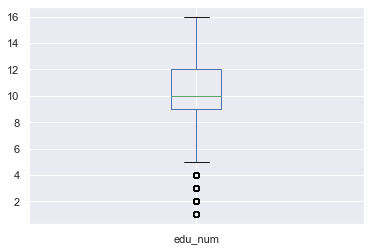

In [10]:
# Check for outliers

df.edu_num.plot(kind = 'box')

This shows the lower level of education has outliers, however it is possible in a population to find afew people who have a very low level of education probably because of a disability or other disadvantages.

# Feature Engineering

In [13]:
# Ratio of <=50K and >50K

24720/(24720+7841)

0.7591904425539756

### Create Feature

To get the net gain it is important to subtract capital_gain from capital_loss this will give us the capital net gain. So we create a column capital_net.

In [19]:
X['capital_net'] = X['capital_gain']-X['capital_loss']

X.head(5)

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,capital_net
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Drop columns

From our exploratory analysis we see that we will need to drop the `fnlwgt` column. This is because this are just reference numbers.We will also drop the `relationship` column because it is very similar to the `marital_status`, therefore it is redundant. The `education` column will be dropped, because it is the same as the `edu-num` column, which represents the education levels with a number.  Since, we have generated the column `capital_net`, we can now drop `capital_gain` and `capital_loss`.

In [20]:
# Drop columns

X.drop(['fnlwgt','education','relationship','capital_gain','capital_loss'], axis=1, inplace=True)

X.head(5)

,age,workclass,edu_num,marital_status,occupation,race,sex,hours_per_week,native_country,capital_net
0,39,State-gov,13,Never-married,Adm-clerical,White,Male,40,United-States,2174
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,White,Male,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,0


### Transform Data

### Transform Y

Y has categorical data <=50K and >50K, we need to change the y data to numerical values. We use the LabelEncoder

In [11]:
# Convert target data into numerical values

le = LabelEncoder()

In [12]:
# Fit label encoder to y

le.fit(y)

LabelEncoder()

In [13]:
# Transform y
le.transform(y)

array([0, 0, 0, ..., 0, 0, 1])

In [14]:
# Class names

le.classes_

array([' <=50K', ' >50K'], dtype=object)

### OneHot Encoder

 The X data is converted from categorical data in X to numeric using the OneHot Encoder from sklearn. The OneHot Encoder ensures that the categorical features do not become ordered or ranked when transformed from strings to numerical format. 

The columns `workclass`,`occupation`,`race`,`sex`,`native_country`, are all strings and need to be changed to numerical values, in order to perform a classification regression. The mentioned columns are in the X target variables.

In [15]:
# import OneHotEncoder
##

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

In [16]:
# instantiate
## encoder = OneHotEncoder(drop = None, categories = 'auto')
##

columnTransformer = ColumnTransformer([OneHotEncoder(drop = None, categories = 'auto')])


In [17]:
##X=np.array(columnTransformer.fit_transform(X), dtype = np.str)
encoder = OneHotEncoder()

encoder.fit(X)

OneHotEncoder()

In [18]:

X = encoder.transform(X)

Looking at X we see that it is now transformed to numpy array by OneHotEncoder.

In [19]:
# Looking at X 
X
             

<32561x473 sparse matrix of type '<class 'numpy.float64'>'
	with 325610 stored elements in Compressed Sparse Row format>

### Splitting Data

In [20]:
# Use train-test-split already imported at the beginning

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 1, stratify = y)


In [21]:
X_train.shape

(26048, 473)

In [22]:
X_test.shape

(6513, 473)

In [23]:
np.unique(y_train, return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([19775,  6273]))

In [24]:
19775/(19775+6273)

0.7591753685503686

In [25]:
np.unique(y_test, return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([4945, 1568]))

# Modeling

## Logistic Regression

In [26]:
# import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

In [27]:
# Already imported Logistic Regression from sklearn
# Instantiate LR with no penalty

lr = LogisticRegression(penalty = 'none', max_iter = 5000)

In [28]:
# fit model

lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, penalty='none')

In [29]:
# Learned the coefficients

lr.coef_

array([[-7.93899788e+00, -1.13975335e+01, -1.41028717e+01,
        -1.62325065e+01, -9.51720179e-01, -6.85066768e-01,
        -1.08065182e+00, -1.98699000e-01,  2.51302897e-01,
         3.96275083e-01,  6.52599561e-01,  8.54702659e-01,
         9.06698929e-01,  1.20052451e+00,  1.25316273e+00,
         1.12040155e+00,  1.11823914e+00,  1.52447731e+00,
         1.30808526e+00,  1.50671496e+00,  1.69829417e+00,
         1.48348072e+00,  1.66426821e+00,  1.71311935e+00,
         1.66587529e+00,  1.72872621e+00,  1.62691981e+00,
         1.74591060e+00,  1.89277615e+00,  1.88535837e+00,
         2.08239842e+00,  2.14970831e+00,  1.80324547e+00,
         2.09660697e+00,  1.79842870e+00,  1.98683383e+00,
         2.05784367e+00,  2.10196313e+00,  1.56980451e+00,
         1.84160088e+00,  1.85442484e+00,  1.83005289e+00,
         2.04993808e+00,  1.65028789e+00,  1.86681208e+00,
         1.32320639e+00,  1.63125909e+00,  1.60203228e+00,
         1.23484957e+00,  1.06259859e+00,  1.23694332e+0

In [42]:
# Check the intercept

lr.intercept_

array([-6.45989614])

In [31]:
# Score ## Accuracy

lr.score(X_train, y_train)

0.8774570024570024

In [44]:
# Score ## Accuracy

score=lr.score(X_test, y_test)

print(score)

0.8696453247351451


### Confusion Matrix for Logistic Regression

In [33]:
# from sklearn import confusion matrix

from sklearn.metrics import confusion_matrix

In [47]:
# Create a confusion metrics

In [34]:
y_pred = lr.predict(X_test)

In [80]:
# Check prediction

y_pred = lr.predict(X_test[1:10])

print(y_pred)

[' <=50K' ' >50K' ' <=50K' ' >50K' ' <=50K' ' <=50K' ' >50K' ' <=50K'
 ' <=50K']


In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4662,  283],
       [ 566, 1002]], dtype=int64)

Text(30.5, 0.5, 'Actual')

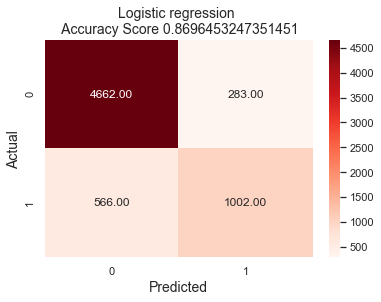

In [77]:
# Plot the confusion matrix

seaborn.heatmap(cm, annot=True, fmt=".2f", cmap=plt.cm.Reds)
plt.title('Logistic regression \n Accuracy Score {0}'.format(score), fontsize=14)
plt.xlabel(('Predicted'), fontsize=14)
plt.ylabel(('Actual'), fontsize=14)

### Cross Validation for Logistic Regression

In [52]:
# from sklearn.model_selection import cross_validate

from sklearn.model_selection import cross_validate

In [53]:
# call cross-validate with return_train_score, return estimator, cv = 5

In [54]:
estimator = LogisticRegression(penalty = 'none', max_iter = 10000)

In [55]:
cv_fivefolds = cross_validate(estimator = estimator, 
                             X = X_train,
                             y = y_train,
                             cv = 5,
                             return_estimator = True,
                             return_train_score = True, verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   3.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV] ................................................. , total=   2.8s
[CV]  ................................................................
[CV] ................................................. , total=   2.8s
[CV]  ................................................................
[CV] ................................................. , total=   2.5s
[CV]  ................................................................
[CV] ................................................. , total=   3.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.6s finished


In [56]:
# investigate cv results 

cv_fivefolds['train_score']

array([0.87829926, 0.87733948, 0.87781937, 0.87782523, 0.87907289])

In [57]:
cv_fivefolds['test_score']

array([0.87178503, 0.87332054, 0.87408829, 0.87195239, 0.86619313])

In [58]:
# Find the mean and standard deviation for cv

lrvalidation_mean = cv_fivefolds['test_score'].mean()
lrvalidation_std = cv_fivefolds['test_score'].std()

In [59]:
print('Logistic Regression 5-fold cv results %.3f =/- %.3f'%(lrvalidation_mean, lrvalidation_std))

Logistic Regression 5-fold cv results 0.871 =/- 0.003


## Decision Trees

In [50]:
# from sklearn import Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

In [51]:
# instantiate

dt_clf = DecisionTreeClassifier()

In [52]:
# fit the model

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
# Score ## accuracy

dt_clf.score(X_train, y_train)

0.9785012285012284

In [54]:
# If we check test score

treescore = dt_clf.score(X_test, y_test)

print(treescore)

0.8375556579149394


### Confusion Matrix for Decision Tree

In [ ]:
# Create a confusion matrix

In [71]:
y_pred_tree = dt_clf.predict(X_test)

In [72]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_tree

array([[4486,  459],
       [ 599,  969]], dtype=int64)

Text(30.5, 0.5, 'Actual')

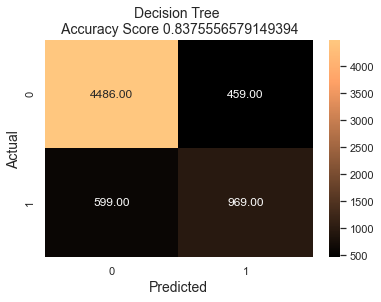

In [78]:
# Plot the confusion matrix

seaborn.heatmap(cm_tree, annot=True, fmt=".2f", cmap=plt.cm.copper)
plt.title('Decision Tree \n Accuracy Score {0}'.format(treescore), fontsize=14)
plt.xlabel(('Predicted'), fontsize=14)
plt.ylabel(('Actual'), fontsize=14)

### Cross Validation of DecisionTrees

In [67]:
# Cross Validate

In [68]:
cv_fivefold = cross_validate(estimator = dt_clf,
                            X = X_train,
                            y = y_train,
                            cv = 5,
                            return_train_score = True,
                            return_estimator = True,
                            verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   1.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ................................................. , total=   1.6s
[CV]  ................................................................
[CV] ................................................. , total=   1.7s
[CV]  ................................................................
[CV] ................................................. , total=   1.5s
[CV]  ................................................................
[CV] ................................................. , total=   1.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.3s finished


In [69]:
# investigate cv results for Decision Tree

cv_fivefold['train_score']

array([0.98176408, 0.98061234, 0.98066033, 0.98075723, 0.98099717])

In [70]:
cv_fivefold['test_score']

array([0.82610365, 0.82955854, 0.83454894, 0.83509311, 0.83605299])

In [71]:
# Find the mean and standard for cv

dtvalidation_mean = cv_fivefold['test_score'].mean()
dtvalidation_std = cv_fivefold['test_score'].std()

In [72]:
# Print results
print('Decision Tree 5-fold cv results %.3f =/- %.3f'%(validation_mean, validation_std))

Decision Tree 5-fold cv results 0.871 =/- 0.003


### Evaluating Model Performance



Which model performed best? We put the score from the 5-fold cross validate into a table to answer the question.


In [79]:
model_performance = pd.DataFrame({
    "Model":["Logistic Regression","Decision Tree"],
    "Validation Mean":[lrvalidation_mean, dtvalidation_mean],
    "Validation Standard deviation":[lrvalidation_std, dtvalidation_std]
    
})

model_performance.sort_values(by = "Validation Mean", ascending = False)

,Model,Validation Mean,Validation Standard deviation
0,Logistic Regression,0.871468,0.002773
1,Decision Tree,0.832271,0.003817


# Conclusion

### Goal


Our goal was to train a classification model that performs better than 0.75 accuracy. We were able to achieve this goal for both the Logistic Regression and Decision Tree. Using the cross-validation the Logistic regression had a mean validation test score of 0.87 and the Decision Tree has a validation test score mean of 0.83.

Using the confusion matrix, the Logistic regression was able to predict correctly 5664 of 6513 of the test data. The Decision tree on the other hand predicted 5475 of the 6513 of the test data. Therefore, the Logistic Regression predict more correctly.

### Research question

- Which model has the best accuracy score?

On the training data the Logistic Regression had an accuracy score of 0.877, while the Decision Tree had a score of 0.978. However on the test score, using the cross-validation table, the Logistic Regression had a train score of about 0.871 with a standard deviation of +/- 0.002. On the other hand, Decision Tree had a test score of 0.832 on the cross-validation with a standard deviation of +/- 0.003. Therefore, the Logistic Regression model performed better. 

- What are some of the ways we can reduce bias?

To reduce bias in our model we used the one-hot encoding method instead of the label encoding. Label encoding gives the categories an integer value, so if there are 4 categories it assigns a number 1, 2, 3, or 4 to the categories, however this can create bias because the machine recognizes 4 as greater than 1 which not the case in categorical data. The onehot encoder assigns a different identifier using 0s and 1s, for each category in a feature and is not hierarchial.

- How do we test our model?

To test our model, we divided our data set into training and test data. We used used the training dataset to train our model, then we used the test dataset to test our model.

## Limitations

This project only tested two classifier models. 
There are other classifier models that could probably have had a better score.

## References

- Gareth J, et.al, An Introduction to Statistical Learning with Application in R, Springer, 8th edition 2017

- [Kaggle](https://www.kaggle.com/samsonqian/titanic-guide-with-sklearn-and-eda)

- [pydata](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

- [PyData](https://www.youtube.com/watch?v=ioXKxulmwVQ)

- [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=onehot%20encoding)

- Ronny Kohavi and Barry Becker, 1996. [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income)
Data Mining and Visualization
Silicon Graphics.

- [adult data](https://www.youtube.com/watch?v=RdggP4yuIHY)

- [Confusion matrix](https://www.youtube.com/watch?v=87Zebzxzh-A)

- [Stackoverflow](https://stackoverflow.com/questions/31797013/how-to-open-a-data-file-extension)